In [128]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

from pyifdm import methods
from pyifdm.graphs import *
from pyifdm.IFS import IFS
from pyifdm.methods import ifs
from pyifdm import weights as ifs_weights
from pyifdm import correlations as corrs
from pyifdm.helpers import rank, generate_ifs_matrix

import warnings

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3)

# Input data

To enable multi-criteria evaluation, the decision matrix needs to be defined. It can be determined based on the real data, or random data generated by the method provided in the library.

In [129]:
# real data matrix
matrix = np.array([
    [[0.4745, 0.5255], [0.4752, 0.5248], [0.2981, 0.7019], [0.4374, 0.5627]],
    [[0.5346, 0.4654], [0.5532, 0.4468], [0.6300, 0.3700], [0.5901, 0.4099]],
    [[0.4324, 0.5676], [0.4030, 0.5970], [0.4298, 0.5702], [0.4361, 0.5639]],
    [[0.5235, 0.4765], [0.4808, 0.5192], [0.5667, 0.4333], [0.2913, 0.7087]],
    [[0.4168, 0.5832], [0.4923, 0.5077], [0.4732, 0.5268], [0.4477, 0.5523]]
])

# randomly generated matrix
# 5 alternatives
# 4 criteria
random_matrix = generate_ifs_matrix(5, 4)
print(random_matrix)

[[[0.458 0.393]
  [0.372 0.616]
  [0.335 0.286]
  [0.088 0.41 ]]

 [[0.051 0.409]
  [0.259 0.435]
  [0.139 0.011]
  [0.462 0.344]]

 [[0.021 0.197]
  [0.076 0.232]
  [0.314 0.418]
  [0.097 0.443]]

 [[0.274 0.188]
  [0.125 0.096]
  [0.351 0.104]
  [0.103 0.161]]

 [[0.634 0.115]
  [0.366 0.138]
  [0.412 0.175]
  [0.348 0.432]]]


# Normalization

Data normalization converts the range of values that they are placed in range between 0 and 1. Below the usage examples of methods implemented in the library is presented. Types parameter are responsible for the direction of the normalization. One columns' values could be more preferred is the values are lower (`-1` - cost), while others could be more preferred if the values are greater (`1` - profit).

In [130]:
normalizations = {
    'Ecer normalization': ifs.normalization.ecer_normalization,
    'Max normalization': ifs.normalization.max_normalization,
    'Min-Max normalization': ifs.normalization.minmax_normalization,
    'Supriya normalization': ifs.normalization.supriya_normalization,
    'Swap normalization': ifs.normalization.swap_normalization,
}

types = np.array([1, -1, 1, -1])

for name, norm in normalizations.items():
    nmatrix = norm(matrix, types)
    print(f'{name}\n\n {nmatrix[:2]}\n')

Ecer normalization

 [[[0.888 0.901]
  [0.848 0.851]
  [0.473 1.   ]
  [0.666 0.728]]

 [[1.    0.798]
  [0.728 1.   ]
  [1.    0.527]
  [0.494 1.   ]]]

Max normalization

 [[[0.753 0.834]
  [0.613 0.555]
  [0.473 1.114]
  [0.666 0.518]]

 [[0.849 0.739]
  [0.527 0.652]
  [1.    0.587]
  [0.494 0.711]]]

Min-Max normalization

 [[[0.49  0.51 ]
  [0.519 0.481]
  [0.    1.   ]
  [0.511 0.489]]

 [[1.    0.   ]
  [0.    1.   ]
  [1.    0.   ]
  [0.    1.   ]]]

Supriya normalization

 [[[0.888 0.112]
  [0.859 0.141]
  [0.473 0.527]
  [0.741 0.259]]

 [[1.    0.   ]
  [1.    0.   ]
  [1.    0.   ]
  [1.    0.   ]]]

Swap normalization

 [[[0.474 0.525]
  [0.525 0.475]
  [0.298 0.702]
  [0.563 0.437]]

 [[0.535 0.465]
  [0.447 0.553]
  [0.63  0.37 ]
  [0.41  0.59 ]]]



# Distance measures

Distance measures allow to indicate how different are given two fuzzy numbers. Different techniques have been developed to this end. The measures for the IFS implemented in the library and their usage are presented below.

In [131]:
distances = {
    'Euclidean' : ifs.distance.euclidean_distance,
    'Grzegorzewski': ifs.distance.grzegorzewski_distance,
    'Hamming': ifs.distance.hamming_distance,
    'Hausdorf Euclidean': ifs.distance.hausdorf_euclidean_distance,
    'Luo distance': ifs.distance.luo_distance,
    'Normalized Hamming': ifs.distance.normalized_hamming_distance,
    'Normalized Euclidean': ifs.distance.normalized_euclidean_distance,
    'Wang Xin 1': ifs.distance.wang_xin_distance_1,
    'Wang Xin 2': ifs.distance.wang_xin_distance_2,
    'Yang Chiclana': ifs.distance.yang_chiclana_distance,
}

x = np.array([0.7, 0.3])
y = np.array([0.45, 0.5])

for name, distance in distances.items():
    if distance.__name__ == 'normalized_euclidean_distance':
        d = np.sqrt(1/2 * distance(x, y))
    elif distance.__name__ == 'normalized_hamming_distance':
        d = 1/2 * distance(x, y)
    else:
        d = distance(x, y)
    print(f'{name}: {d}')

Euclidean: 0.22912878474779197
Grzegorzewski: 0.24999999999999994
Hamming: 0.24999999999999997
Hausdorf Euclidean: 0.06249999999999997
Luo distance: 0.11249999999999996
Normalized Hamming: 0.24999999999999997
Normalized Euclidean: 0.22912878474779197
Wang Xin 1: 0.23749999999999996
Wang Xin 2: 0.22499999999999998
Yang Chiclana: 0.24999999999999994


# Score functions

To create a crisp ranking from the calculations performed in fuzzy environment, the score functions should be used. Different techniques can be applied to achieve this. The implemented methods and the example of their usage are presented below.

In [132]:
score_functions = {
    'Chen score 1': ifs.score.chen_score_1,                                                                                          
    'Chen score 2': ifs.score.chen_score_2,                                                                                          
    'Kharal score 1': ifs.score.kharal_score_1,                                                                                          
    'Kharal score 2': ifs.score.kharal_score_2,                                                                                          
    'Liu Wang score': ifs.score.liu_wang_score,                                                                                          
    'Supriya score': ifs.score.supriya_score,                                                                                          
    'Thakur score': ifs.score.thakur_score,                                                                                          
    'Wan Dong score 1': ifs.score.wan_dong_score_1,                                                                                          
    'Wan Dong score 2': ifs.score.wan_dong_score_2,                                                                                          
    'Wei score': ifs.score.wei_score,                                                                                          
    'Zhang Xu score 1': ifs.score.zhang_xu_score_1,                                                                                          
    'Zhang Xu score 2': ifs.score.zhang_xu_score_2,                                                                                          
}

x = np.array([0.8, 0.15])

for name, score in score_functions.items():
    d = score(x)
    print(f'{name}: {d}')

Chen score 1: 0.65
Chen score 2: 0.825
Kharal score 1: 0.7000000000000001
Kharal score 2: 0.42500000000000004
Liu Wang score: 0.84
Supriya score: 0.7925000000000001
Thakur score: 0.6175000000000002
Wan Dong score 1: 0.6625
Wan Dong score 2: 0.825
Wei score: 0.563320058063622
Zhang Xu score 1: 0.8095238095238094
Zhang Xu score 2: 0.7894736842105263


# IFS-similarity measures

To compare the similarity of Intuitionistic Fuzzy Sets, selected similarity measures were implemented in the library. Based on those measures, it could be indicated how the compared IFS are alike.

In [133]:
similarity_measures = {
    'Chen similarity': ifs.similarity.chen_similarity,                                                                                         
    'Fan-Zhang similarity': ifs.similarity.fan_zhang_similarity,                                                                                         
    'Hong-Kim similarity': ifs.similarity.hong_kim_similarity,                                                                                         
    'Li similarity': ifs.similarity.li_similarity,                                                                                         
    'Li-Xu similarity': ifs.similarity.li_xu_similarity,                                                                                         
    'Ye similarity': ifs.similarity.ye_similarity,                                                                                         
}

x = np.array([0.8, 0.15])
y = np.array([0.7, 0.28])

for name, similarity in similarity_measures.items():
    d = similarity(x, y)
    print(f'{name}: {d}')

Chen similarity: 0.885
Fan-Zhang similarity: 0.885
Hong-Kim similarity: 0.8849999999999999
Li similarity: 0.884025864952568
Li-Xu similarity: 0.675
Ye similarity: 0.9810169593645323


# Weights

Criteria weights in multi-criteria problems are responsible for the importance of each parameter taken into consideration. The greater value assigned to the given criterion, the more important it will be in the assessment. For the purpose of weights definition, different methods from the library can be used. They are based on the statistical approach, which makes it possible to define the weights objectively, relying only on data diversity.

In [134]:
matrix = np.array([
    [[0.4874, 0.3382], [0.3130, 0.5747], [0.5342, 0.3512], [0.5187, 0.3641]],
    [[0.7184, 0.2087], [0.2840, 0.6350], [0.6906, 0.2309], [0.6696, 0.2628]],
    [[0.5039, 0.4103], [0.2863, 0.5766], [0.4662, 0.4452], [0.5123, 0.3796]],
    [[0.5575, 0.3284], [0.3331, 0.5524], [0.5265, 0.3718], [0.5219, 0.3727]],
    [[0.4975, 0.4319], [0.3695, 0.5372], [0.4479, 0.4860], [0.6371, 0.1889]]
])

weights_methods = {
    'Burillo Entropy': ifs_weights.burillo_entropy_weights,
    'Equal': ifs_weights.equal_weights,
    'Entropy': ifs_weights.entropy_weights,
    'Liu Entropy': ifs_weights.liu_entropy_weights,
    'Szmidt Entropy': ifs_weights.szmidt_entropy_weights,
    'Thakur Entropy': ifs_weights.thakur_entropy_weights,
    'Ye Entropy': ifs_weights.ye_entropy_weights,
}

for name, method in weights_methods.items():
    w = method(matrix)
    print(f'{name} \n {w}\n')

Burillo Entropy 
 [0.25  0.249 0.254 0.247]

Equal 
 [0.25 0.25 0.25 0.25]

Entropy 
 [0.249 0.239 0.287 0.225]

Liu Entropy 
 [0.754 0.693 0.796 0.703]

Szmidt Entropy 
 [0.379 0.527 0.411 0.386]

Thakur Entropy 
 [0.246 0.235 0.255 0.265]

Ye Entropy 
 [0.928 0.926 0.944 0.91 ]



# Evaluation 

Different techniques from the group of Fuzzy Multi-Criteria Decision Analysis methods based on the Intuitionistic Fuzzy Sets can be used to assess the alternatives. The library includes 9 methods which can be used for this purpose. The examples of their application are presented below.

## Decision matrix

Decision matrix represents the alternatives taken into consideration in the problem. Rows represent amount of alternatives, when columns describes the amount of criteria in the given problem. In the case presented below, we have 5 alternatives and 4 criteria. Moreover, all elements in the matrix should be represent as the Intuitionistic Fuzzy Sets. Both representations with 2 or 3 elements in a fuzzy set are allowed.

In [135]:
matrix = np.array([
    [[0.4745, 0.5255], [0.4752, 0.5248], [0.2981, 0.7019], [0.4374, 0.5627]],
    [[0.5346, 0.4654], [0.5532, 0.4468], [0.6300, 0.3700], [0.5901, 0.4099]],
    [[0.4324, 0.5676], [0.4030, 0.5970], [0.4298, 0.5702], [0.4361, 0.5639]],
    [[0.5235, 0.4765], [0.4808, 0.5192], [0.5667, 0.4333], [0.2913, 0.7087]],
    [[0.4168, 0.5832], [0.4923, 0.5077], [0.4732, 0.5268], [0.4477, 0.5523]]
])

## Weights

Weights can be defined objectively, as shown above with the given examples. However, the weights can be also defined directly based on expert knowledge. The library is implemented in a way to handle both crisp and fuzzy weights. Amount of weights should equal the criteria amount. They can be determined as follow.

### Example 1
Crisp weights

In [136]:
crisp_weights = np.array([0.2, 0.3, 0.15, 0.35])

### Example 2
Intuitionistic Fuzzy Sets

In [137]:
fuzzy_weights = np.array([[0.6, 0.35], [0.8, 0.2], [0.5, 0.45], [0.2, 0.7]])

## Criteria 

Criteria types are used to reflect the direction of the values that is preferable in the problem. If the values for given criterion should be as big as possible, it is then a profit type and represent as `1` in the criteria types array. If the values should be as low as possible, it is then cost and should be represent as `-1` in the array. Moreover, the criteria types amount should equal amount of criteria in the decision matrix.

In [138]:
types = np.array([1, -1, 1, -1])

## IF-ARAS

In [139]:
if_aras = methods.ifARAS()

IF-ARAS evaluation results with crisp and fuzzy weights  

In [140]:
print(f'Crisp weights: {if_aras(matrix, crisp_weights, types)}')
print(f'Fuzzy weights: {if_aras(matrix, fuzzy_weights, types)}')

Crisp weights: [0.914 0.91  0.933 0.977 0.917]
Fuzzy weights: [0.879 0.915 0.909 0.968 0.895]


The ranking can be calculated after performing evaluation with the rank method from IF-ARAS object

In [141]:
if_aras.rank()

array([5., 2., 3., 1., 4.])

The ARAS method can be used with different normalizations. Default, it is a `swap_normalization`.

In [142]:
aras = {
    'Ecer normalization': methods.ifARAS(normalization=ifs.normalization.ecer_normalization),
    'Minmax normalization': methods.ifARAS(normalization=ifs.normalization.minmax_normalization),
    'Supriya normalization': methods.ifARAS(normalization=ifs.normalization.supriya_normalization),
    'Swap normalization': methods.ifARAS(normalization=ifs.normalization.swap_normalization),
}

For every normalization technique, the assessment can be performed to obtain results and check if the type of normalization impacts the outcome.

In [143]:
results = {}
for name, function in aras.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [144]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(matrix.shape[0])]))

Method                   A1    A2    A3    A4    A5
---------------------  ----  ----  ----  ----  ----
Ecer normalization     0.72  0.82  0.76  0.92  0.73
Minmax normalization   0.47  0.67  0.59  0.75  0.46
Supriya normalization  0.83  1.28  0.81  0.92  0.86
Swap normalization     0.88  0.91  0.91  0.97  0.89


It can be seen that different preferences are obtained with different normalizations. To check if the alternatives are ranked at the same place despite used normalization method, we can use the method from the library called `rank` which calculates ascending or descending position order based on given array. Since the IF-ARAS method assess better alternatives with higher values, the order should be descending. 

In [145]:
print(tabulate([[name, *rank(pref, descending=True)] for name, pref in results.items()], 
    headers=['Method'] + [f'A{i+1}' for i in range(matrix.shape[0])]))

Method                   A1    A2    A3    A4    A5
---------------------  ----  ----  ----  ----  ----
Ecer normalization        5     2     3     1     4
Minmax normalization      4     2     3     1     5
Supriya normalization     4     1     5     2     3
Swap normalization        5     2     3     1     4


It can be seen, that the ranking of alternatives is different for different normalization techniques. So the user should bear in mind that different methods can have impact the final result obtained within selected evaluation method.

## IF-CODAS

In [146]:
if_codas = methods.ifCODAS()
print(f'Preferences: {if_codas(matrix, fuzzy_weights, types)}')
print(f'Ranking: {if_codas.rank()}')

Preferences: [-1.056  2.182 -1.171  0.348 -0.303]
Ranking: [4. 1. 5. 2. 3.]


Within the CODAS method we can also use different normalizations, as it was in the ARAS method. In addition, we can use different distance metrics to calculate the alternatives preference. Default the `distance_1` is the `euclidean_distance` and `distance_2` is the `hamming_distance`. While calling the fuzzy CODAS object, the `tau` parameter can be given, which is set to `0.05` as default. It is treated as the threshold parameter while calculating the relative assessment matrix. CODAS also assessed better alternatives with higher preferences.

In [147]:
codas = {
    'Pair 1': methods.ifCODAS(distance_1=ifs.distance.euclidean_distance, distance_2=ifs.distance.hamming_distance),
    'Pair 2': methods.ifCODAS(distance_1=ifs.distance.normalized_euclidean_distance, distance_2=ifs.distance.normalized_hamming_distance),
    'Pair 3': methods.ifCODAS(distance_1=ifs.distance.wang_xin_distance_1, distance_2=ifs.distance.wang_xin_distance_2),
}

Now, when the CODAS object with different pairs of distances is defined, the results can be calculated.

In [148]:
results = {}
for name, function in codas.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [149]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(matrix.shape[0])]))

Method       A1    A2     A3    A4    A5
--------  -----  ----  -----  ----  ----
Pair 1    -1.06  2.18  -1.17  0.35  -0.3
Pair 2    -0.23  0.48  -0.23  0.08  -0.1
Pair 3    -1.04  2.14  -1.16  0.37  -0.3


It can be seen, that different distance metrics also have impact on the final results.

## IF-COPRAS

In [150]:
if_copras = methods.ifCOPRAS()
print(f'Preferences: {if_copras(matrix, fuzzy_weights, types)}')
print(f'Ranking: {if_copras.rank()}')

Preferences: [0.091 0.728 0.365 1.    0.3  ]
Ranking: [5. 2. 3. 1. 4.]


In the COPRAS technique, the used score function can be modified. The `thakur_score` is set as default. Similarly to previous methods, better alternatives are assessed with higher preferences.

In [151]:
copras = {
    'Chen score 1': methods.ifCOPRAS(score=ifs.score.chen_score_1),                                                                                          
    'Chen score 2': methods.ifCOPRAS(score=ifs.score.chen_score_2),                                                                                          
    'Kharal score 1': methods.ifCOPRAS(score=ifs.score.kharal_score_1),                                                                                          
    'Kharal score 2': methods.ifCOPRAS(score=ifs.score.kharal_score_2),                                                                                          
    'Liu Wang score': methods.ifCOPRAS(score=ifs.score.liu_wang_score),                                                                                          
    'Supriya score': methods.ifCOPRAS(score=ifs.score.supriya_score),                                                                                          
    'Thakur score': methods.ifCOPRAS(score=ifs.score.thakur_score),                                                                                          
    'Wan Dong score 1': methods.ifCOPRAS(score=ifs.score.wan_dong_score_1),                                                                                          
    'Wan Dong score 2': methods.ifCOPRAS(score=ifs.score.wan_dong_score_2),                                                                                          
    'Wei score': methods.ifCOPRAS(score=ifs.score.wei_score),                                                                                          
    'Zhang Xu score 1': methods.ifCOPRAS(score=ifs.score.zhang_xu_score_1),                                                                                          
    'Zhang Xu score 2': methods.ifCOPRAS(score=ifs.score.zhang_xu_score_2),
}

In [152]:
results = {}
for name, function in copras.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [153]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(matrix.shape[0])]))

Method              A1    A2    A3    A4    A5
----------------  ----  ----  ----  ----  ----
Chen score 1      0.29  0.75  0.51  1     0.46
Chen score 2      0.9   0.92  0.94  1     0.92
Kharal score 1    0.8   0.9   0.88  1     0.84
Kharal score 2    0.97  0.99  1     0.96  0.97
Liu Wang score    0.91  0.94  0.96  1     0.92
Supriya score     0.92  0.96  0.98  1     0.93
Thakur score      0.09  0.73  0.36  1     0.3
Wan Dong score 1  0.95  0.96  0.97  1     0.96
Wan Dong score 2  0.9   0.92  0.94  1     0.92
Wei score         0.85  0.86  0.91  1     0.87
Zhang Xu score 1  0.89  0.93  0.93  1     0.91
Zhang Xu score 2  0.92  0.97  0.97  1     0.94


## IF EDAS

In [154]:
if_edas = methods.ifEDAS()
print(f'Preferences: {if_edas(matrix, fuzzy_weights, types)}')
print(f'Ranking: {if_edas.rank()}')

Preferences: [0.011 0.59  0.461 0.927 0.199]
Ranking: [5. 2. 3. 1. 4.]


In case of using the IF-EDAS method, the normalization function and score function can be changed. EDAS also evaluate better alternatives with higher preferences.

In [155]:
edas = {
    'Ecer normalization': methods.ifEDAS(normalization=ifs.normalization.ecer_normalization),
    'Minmax normalization': methods.ifEDAS(normalization=ifs.normalization.minmax_normalization),
    'Supriya normalization': methods.ifEDAS(normalization=ifs.normalization.supriya_normalization),
    'Swap normalization': methods.ifEDAS(normalization=ifs.normalization.swap_normalization),
}

After IF-EDAS object definition, we can calculate the results based on using different normalizations.

In [156]:
results = {}
for name, function in edas.items():
    results[name] = function(matrix, crisp_weights, types)

In [157]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(matrix.shape[0])]))

Method                   A1    A2    A3    A4    A5
---------------------  ----  ----  ----  ----  ----
Ecer normalization     0.41  0.48  0.92  1     0.91
Minmax normalization   0.06  0     0.17  0.34  0.01
Supriya normalization  0.05  0.5   0     0.04  0.12
Swap normalization     0.28  0.26  0.52  1     0.32


It can be noticed that the results are highly similar while using different methods to calculate score and obtain crisp values.

## IF-MABAC

In [158]:
if_mabac = methods.ifMABAC()
print(f'Preferences: {if_mabac(matrix, fuzzy_weights, types)}')
print(f'Ranking: {if_mabac.rank()}')

Preferences: [-0.106 -0.186 -0.084  0.226 -0.276]
Ranking: [3. 4. 2. 1. 5.]


While using the IF-MABAC method, the normalization, distance, score function and adjust parameters can be modified. MABAC classify better alternatives with higher preferences.

In [159]:
mabac = {
    'Euclidean' : methods.ifMABAC(distance=ifs.distance.euclidean_distance),
    'Grzegorzewski': methods.ifMABAC(distance=ifs.distance.grzegorzewski_distance),
    'Hamming': methods.ifMABAC(distance=ifs.distance.hamming_distance),
    'Luo distance': methods.ifMABAC(distance=ifs.distance.luo_distance),
    'Normalized Euclidean': methods.ifMABAC(distance=ifs.distance.normalized_euclidean_distance),
    'Normalized Hamming': methods.ifMABAC(distance=ifs.distance.normalized_hamming_distance),
    'Wang Xin 1': methods.ifMABAC(distance=ifs.distance.wang_xin_distance_1),
    'Wang Xin 2': methods.ifMABAC(distance=ifs.distance.wang_xin_distance_2),
    'Yang Chiclana': methods.ifMABAC(distance=ifs.distance.yang_chiclana_distance),
}

In [160]:
results = {}
for name, function in mabac.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [161]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(matrix.shape[0])]))

Method                   A1     A2     A3    A4     A5
--------------------  -----  -----  -----  ----  -----
Euclidean              0.18  -0.99  -0     0.64  -0.65
Grzegorzewski         -0.36  -0.35  -0.09  0.32  -0.17
Hamming                0.01  -0.92  -0.06  0.61  -0.58
Luo distance          -0.11  -0.19  -0.08  0.23  -0.28
Normalized Euclidean   0.1   -0.54  -0     0.35  -0.35
Normalized Hamming     0     -0.27  -0.02  0.18  -0.17
Wang Xin 1            -0.36  -0.28  -0.1   0.29  -0.16
Wang Xin 2            -0.36  -0.21  -0.11  0.26  -0.15
Yang Chiclana         -0.37  -0.15  -0.1   0.23  -0.18


Again it can seen, that different distances measure used in the assessment have impact on the final result from the IF-MABAC method.

## IF-MAIRCA

In [162]:
if_mairca = methods.ifMAIRCA()
print(f'Preferences: {if_mairca(matrix, fuzzy_weights, types)}')
print(f'Ranking: {if_mairca.rank()}')

Preferences: [0.268 0.204 0.194 0.115 0.294]
Ranking: [2. 3. 4. 5. 1.]


IF-MAIRCA method allows for adjusting the parameters responsible for the normalization and the distance measures. Default settings covers the `minmax_normalization` and the `normalized_euclidean_distance`. MAIRCA assigns higher preference values to better classified alternatives.

In [163]:
mairca = {
    'Euclidean' : methods.ifMAIRCA(distance=ifs.distance.euclidean_distance),
    'Grzegorzewski': methods.ifMAIRCA(distance=ifs.distance.grzegorzewski_distance),
    'Hamming': methods.ifMAIRCA(distance=ifs.distance.hamming_distance),
    'Luo distance': methods.ifMAIRCA(distance=ifs.distance.luo_distance),
    'Normalized Euclidean': methods.ifMAIRCA(distance=ifs.distance.normalized_euclidean_distance),
    'Normalized Hamming': methods.ifMAIRCA(distance=ifs.distance.normalized_hamming_distance),
    'Wang Xin 1': methods.ifMAIRCA(distance=ifs.distance.wang_xin_distance_1),
    'Wang Xin 2': methods.ifMAIRCA(distance=ifs.distance.wang_xin_distance_2),
    'Yang Chiclana': methods.ifMAIRCA(distance=ifs.distance.yang_chiclana_distance),
}


In [164]:
results = {}
for name, function in mairca.items():
    results[name] = function(matrix, crisp_weights, types)

In [165]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(matrix.shape[0])]))

Method                  A1    A2    A3    A4    A5
--------------------  ----  ----  ----  ----  ----
Euclidean             0.11  0.13  0.09  0.04  0.13
Grzegorzewski         0.11  0.13  0.09  0.04  0.13
Hamming               0.11  0.13  0.09  0.04  0.13
Luo distance          0.11  0.13  0.09  0.04  0.13
Normalized Euclidean  0.11  0.13  0.09  0.04  0.13
Normalized Hamming    0.11  0.13  0.09  0.04  0.13
Wang Xin 1            0.11  0.13  0.09  0.04  0.13
Wang Xin 2            0.11  0.13  0.09  0.04  0.13
Yang Chiclana         0.11  0.13  0.09  0.04  0.13


It can be seen, that using different distances in this particular case did not cause any changes in the assessments, which shows high robustness of the results.

## IF-MARCOS

In [166]:
if_marcos = methods.ifMARCOS()
print(f'Preferences: {if_marcos(matrix, crisp_weights, types)}')
print(f'Ranking: {if_marcos.rank()}')

Preferences: [0.587 0.598 0.635 0.766 0.598]
Ranking: [5. 3. 2. 1. 4.]


IF-MARCOS method calculations are based on extending the decision matrix and indicating the worst and best potential alternatives, based on which the considered alternatives are evaluated. The calculations could be performed only for crisp_weights.

## IF-MOORA

In [167]:
if_moora = methods.ifMOORA()
print(f'Preferences: {if_moora(matrix, fuzzy_weights, types)}')
print(f'Ranking: {if_moora.rank()}')

Preferences: [-0.046  0.024  0.036  0.079 -0.025]
Ranking: [5. 3. 2. 1. 4.]


IF-MOORA assigns higher preferences to better alternatives. It allows for the modification of the score function, and the default method is set to `zhnag_xu_score_2`.

In [168]:
moora = {
    'Chen score 1': methods.ifMOORA(score=ifs.score.chen_score_1),                                                                                          
    'Chen score 2': methods.ifMOORA(score=ifs.score.chen_score_2),                                                                                          
    'Kharal score 1': methods.ifMOORA(score=ifs.score.kharal_score_1),                                                                                          
    'Kharal score 2': methods.ifMOORA(score=ifs.score.kharal_score_2),                                                                                          
    'Liu Wang score': methods.ifMOORA(score=ifs.score.liu_wang_score),                                                                                          
    'Supriya score': methods.ifMOORA(score=ifs.score.supriya_score),                                                                                          
    'Thakur score': methods.ifMOORA(score=ifs.score.thakur_score),                                                                                          
    'Wan Dong score 1': methods.ifMOORA(score=ifs.score.wan_dong_score_1),                                                                                          
    'Wan Dong score 2': methods.ifMOORA(score=ifs.score.wan_dong_score_2),                                                                                          
    'Wei score': methods.ifMOORA(score=ifs.score.wei_score),                                                                                          
    'Zhang Xu score 1': methods.ifMOORA(score=ifs.score.zhang_xu_score_1),                                                                                          
    'Zhang Xu score 2': methods.ifMOORA(score=ifs.score.zhang_xu_score_2),
}

In [169]:
results = {}
for name, function in moora.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [170]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(matrix.shape[0])]))

Method               A1     A2     A3     A4     A5
----------------  -----  -----  -----  -----  -----
Chen score 1      -0.08   0.06   0.08   0.2   -0.04
Chen score 2      -0.04   0.03   0.04   0.1   -0.02
Kharal score 1    -0.06   0.04   0.06   0.13  -0.03
Kharal score 2    -0.01  -0.01  -0     -0.03  -0.01
Liu Wang score    -0.04   0.03   0.04   0.1   -0.02
Supriya score     -0.05   0.02   0.04   0.08  -0.02
Thakur score      -0.08   0.06   0.08   0.19  -0.03
Wan Dong score 1  -0.02   0.01   0.02   0.05  -0.01
Wan Dong score 2  -0.04   0.03   0.04   0.1   -0.02
Wei score         -0.03  -0.01   0.03   0.02  -0.01
Zhang Xu score 1  -0.04   0.03   0.04   0.1   -0.02
Zhang Xu score 2  -0.05   0.02   0.04   0.08  -0.02


## IF-OCRA

In [171]:
if_ocra = methods.ifOCRA()
print(f'Preferences: {if_ocra(matrix, crisp_weights, types)}')
print(f'Ranking: {if_ocra.rank()}')

Preferences: [0.211 0.    0.379 0.471 0.194]
Ranking: [3. 5. 2. 1. 4.]


The IF-OCRA method allow to calculate the preferences of alternatives only with crisp weights.

## IF-TOPSIS

In [172]:
if_topsis = methods.ifTOPSIS()
print(f'Preferences: {if_topsis(matrix, fuzzy_weights, types)}')
print(f'Ranking: {if_topsis.rank()}')

Preferences: [0.301 0.569 0.529 0.722 0.445]
Ranking: [5. 2. 3. 1. 4.]


IF-TOPSIS technique allows for adjusting the parameters responsible the distance calculation. Default distance is set to `normalized_euclidean_distance`. TOPSIS assures, that better alternatives have higher preferences values. 

In [173]:
topsis = {
    'Euclidean' : methods.ifTOPSIS(distance=ifs.distance.euclidean_distance),
    'Grzegorzewski': methods.ifTOPSIS(distance=ifs.distance.grzegorzewski_distance),
    'Hamming': methods.ifTOPSIS(distance=ifs.distance.hamming_distance),
    'Luo distance': methods.ifTOPSIS(distance=ifs.distance.luo_distance),
    'Normalized Hamming': methods.ifTOPSIS(distance=ifs.distance.normalized_hamming_distance),
    'Normalized Euclidean': methods.ifTOPSIS(distance=ifs.distance.normalized_euclidean_distance),
    'Wang Xin 1': methods.ifTOPSIS(distance=ifs.distance.wang_xin_distance_1),
    'Wang Xin 2': methods.ifTOPSIS(distance=ifs.distance.wang_xin_distance_2),
    'Yang Chiclana': methods.ifTOPSIS(distance=ifs.distance.yang_chiclana_distance),
}

In [174]:
results = {}
for name, function in topsis.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [175]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(matrix.shape[0])]))

Method                  A1    A2    A3    A4    A5
--------------------  ----  ----  ----  ----  ----
Euclidean             0.31  0.56  0.54  0.77  0.4
Grzegorzewski         0.31  0.55  0.53  0.78  0.4
Hamming               0.31  0.55  0.53  0.78  0.4
Luo distance          0.31  0.55  0.53  0.77  0.4
Normalized Hamming    0.31  0.55  0.53  0.78  0.4
Normalized Euclidean  0.3   0.57  0.53  0.72  0.45
Wang Xin 1            0.31  0.56  0.53  0.77  0.4
Wang Xin 2            0.31  0.56  0.54  0.77  0.4
Yang Chiclana         0.31  0.57  0.54  0.76  0.4


## IF-VIKOR

In [176]:
if_vikor = methods.ifVIKOR()
res = if_vikor(matrix, fuzzy_weights, types)
print('PREFERENCES')
print(f'S: {res[0]}')
print(f'R: {res[1]}')
print(f'Q: {res[2]}')

ranks = if_vikor.rank()
print('RANKINGS')
print(f'S: {ranks[0]}')
print(f'R: {ranks[1]}')
print(f'Q: {ranks[2]}')


PREFERENCES
S: [2.414 0.    2.861 1.653 2.233]
R: [0.5 0.  0.8 0.7 0.6]
Q: [0.734 0.    1.    0.726 0.765]
RANKINGS
S: [4. 1. 5. 2. 3.]
R: [2. 1. 5. 4. 3.]
Q: [3. 1. 5. 2. 4.]


VIKOR method is characterized by returning three assessment vectors (S, R, Q). The difference between them lays in the way how they are calculated in the final phase of the evaluation. The VIKOR method performance can be adjusted with the distance method, which by default is set to `hamming_distance`. Moreover, while creating the IF-VIKOR object, the `v` parameter can be given, which translates how the weight of the strategy will behave. It is set to `0.5` as default. VIKOR ranking can be calculated by sorting the preferences in the ascending order, so in the `rank` method, the parameter should be sey as `descending=False`.

In [177]:
vikor = {
    'Euclidean' : methods.ifVIKOR(distance=ifs.distance.euclidean_distance),
    'Grzegorzewski': methods.ifVIKOR(distance=ifs.distance.grzegorzewski_distance),
    'Hamming': methods.ifVIKOR(distance=ifs.distance.hamming_distance),
    'Luo distance': methods.ifVIKOR(distance=ifs.distance.luo_distance),
    'Normalized Euclidean': methods.ifVIKOR(distance=ifs.distance.normalized_euclidean_distance),
    'Normalized Hamming': methods.ifVIKOR(distance=ifs.distance.normalized_hamming_distance),
    'Wang Xin 1': methods.ifVIKOR(distance=ifs.distance.wang_xin_distance_1),
    'Wang Xin 2': methods.ifVIKOR(distance=ifs.distance.wang_xin_distance_2),
    'Yang Chiclana': methods.ifVIKOR(distance=ifs.distance.yang_chiclana_distance),
}

In [178]:
results = {}
for name, function in vikor.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [179]:
print(tabulate([[name, *np.round(pref[0], 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(matrix.shape[0])]))

Method                  A1    A2    A3    A4    A5
--------------------  ----  ----  ----  ----  ----
Euclidean             2.41     0  2.86  1.65  2.23
Grzegorzewski         2.41     0  2.86  1.65  2.23
Hamming               2.41     0  2.86  1.65  2.23
Luo distance          2.41     0  2.86  1.65  2.23
Normalized Euclidean  2.41     0  2.86  1.65  2.23
Normalized Hamming    2.41     0  2.86  1.65  2.23
Wang Xin 1            2.41     0  2.86  1.65  2.23
Wang Xin 2            2.41     0  2.86  1.65  2.23
Yang Chiclana         2.41     0  2.86  1.65  2.23


## IF-WASPAS

In [180]:
if_waspas = methods.ifWASPAS()
print(f'Preferences: {if_waspas(matrix, fuzzy_weights, types)}')
print(f'Ranking: {if_waspas.rank()}')

Preferences: [0.419 0.579 0.425 0.462 0.457]
Ranking: [5. 1. 4. 2. 3.]


The WASPAS method is using the normalization and score methods. By default, the normalization is set to `None` and the score is set to `chen_score_1`. Moreover, in calculations it is using the `v` parameter, which represents the aggregating coefficient of decision precision. By default it is set to `0.5`.

## IF-WPM

In [181]:
if_wpm = methods.ifWPM()
print(f'Preferences: {if_wpm(matrix, fuzzy_weights, types)}')
print(f'Ranking: {if_wpm.rank()}')

Preferences: [0.157 0.304 0.156 0.218 0.192]
Ranking: [4. 1. 5. 2. 3.]


The WPM method is also based on two adjustable parameters, the normalization and score methods. By default, the normalization is set to `None` and the score is set to `chen_score_1`.

## IF-WSM

In [182]:
if_wsm = methods.ifWSM()
print(f'Preferences: {if_wsm(matrix, fuzzy_weights, types)}')
print(f'Ranking: {if_wsm.rank()}')

Preferences: [-2.205 -1.393 -2.189 -1.945 -2.029]
Ranking: [5. 1. 4. 2. 3.]


As in the case of the WPM method, the WSM method is based on two adjustable parameters, the normalization method and score function. By default, the normalization is set to `None` and the score is set to `chen_score_1`.

# Correlation

Correlation coefficients are used to indicate the similarity between preferences and rankings. In the PyIFDM package, there are implemented four different methods. The example of their usage is presented below. The `pearson_coef` and `spearman_coef` are used to compare the preference values, while `weighted_spearman_coef` and `ws_rank_similarity_coef` can be used to compare rankings.

### Example 1
Preferences comparison

In [183]:
x = np.array([0.62, 0.90, 0.53, 0.87, 0.12])
y = np.array([0.56, 0.34, 0.54, 0.82, 0.32])

print(f'Pearson: {corrs.pearson_coef(x, y)}')
print(f'Spearman: {corrs.spearman_coef(x, y)}')

Pearson: 0.4790813778576422
Spearman: 0.4790813778576422


### Example 2
Rankings comparison

In [184]:
x = np.array([5, 3, 1, 2, 4])
y = np.array([4, 1, 2, 3, 5])

print(f'Weighted Spearman: {corrs.weighted_spearman_coef(x, y)}')
print(f'WS rank similarity: {corrs.ws_rank_similarity_coef(x, y)}')

Weighted Spearman: 0.55
WS rank similarity: 0.6380208333333334


# Intuitionistic Fuzzy Sets

In [185]:
# Example Usage:
ifs1 = IFS(0.6, 0.2)
ifs2 = IFS(0.8, 0.1)

# Addition
addition_result = ifs1 + ifs2
print("Addition result:", addition_result)

# Subtraction
subtraction_result = ifs1 - ifs2
print("Subtraction result:", subtraction_result)

# Multiplication
multiplication_result = ifs1 * ifs2
print("Multiplication result:", multiplication_result)

# Division
division_result = ifs1 / ifs2
print("Division result:", division_result)

# Power
power_result = ifs1 ** 2
print("Power result:", power_result)

# Intersection
intersection_result = ifs1 & ifs2
print("Intersection result:", intersection_result)

# Union
union_result = ifs1 | ifs2
print("Union result:", union_result)

# Complement
complement_result = ~ifs1
print("Complement result:", complement_result)

# Ordered Weighted Averaging (OWA) Aggregation
owa_weights = [0.3, 0.4, 0.3]
owa_result = ifs1.owa_aggregation(owa_weights)
print("OWA Aggregation result:", owa_result)

# Dominance
is_dominating = ifs1.dominance(ifs2)
print("Is Dominating:", is_dominating)

# Jaccard Similarity
jaccard_similarity = ifs1.similarity_jaccard(ifs2)
print("Jaccard Similarity:", jaccard_similarity)

# Fuzzy Relation
fuzzy_relation_matrix = ifs1.fuzzy_relation(ifs2)
print("Fuzzy Relation Matrix:")
print(fuzzy_relation_matrix)


Addition result: Membership: 0.9199999999999999, Non-membership: 0.1, Uncertainty: 0.0
Subtraction result: Membership: -1.0000000000000007, Non-membership: 2.0, Uncertainty: 6.661338147750939e-16
Multiplication result: Membership: 0.48, Non-membership: 0.28, Uncertainty: 0.24
Division result: Membership: 0.7499999999999999, Non-membership: 0.11111111111111112, Uncertainty: 0.13888888888888895
Power result: Membership: 0.36, Non-membership: 0.3599999999999999, Uncertainty: 0.28000000000000014
Intersection result: Membership: 0.6, Non-membership: 0.2, Uncertainty: 0.19999999999999996
Union result: Membership: 0.8, Non-membership: 0.1, Uncertainty: 0.09999999999999998
Complement result: Membership: 0.2, Non-membership: 0.6, Uncertainty: 0.2
OWA Aggregation result: 0.32
Is Dominating: False
Jaccard Similarity: 0.6666666666666666
Fuzzy Relation Matrix:
[[0.6 0.1 0.1]
 [0.2 0.1 0.1]
 [0.2 0.1 0.1]]


Based on the implemented `IFS` class, the basic mathematical operations on Intuitionistic Fuzzy Sets are allowed. The implementation allows for calculating addiitional metrics like `Jaccard similarity`, `Ordered Weighting Averaging (OWA) aggregation`, or `Fuzzy relation matrix`. 

# Graphs

The PyIFDM package handles visualizations of IFS with `matplotlib` package. The example visualizations of Intuitionistic Fuzzy Sets are presented below.

## Criteria bar plot

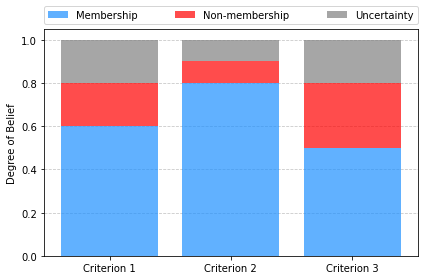

In [186]:
criteria_weights_example = [[0.6, 0.2, 0.2], [0.8, 0.1, 0.1], [0.5, 0.3, 0.2]]
criteria_names_example = ['Criterion 1', 'Criterion 2', 'Criterion 3']
ifs_criteria_bar_plot(criteria_weights_example, criteria_names_example)
plt.show()

## Heatmap plot

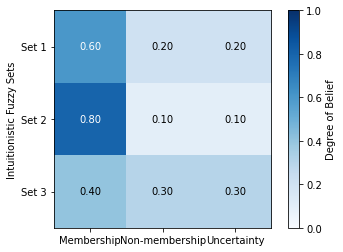

In [187]:
ifs_matrix_example = [
    [0.6, 0.2, 0.2],
    [0.8, 0.1, 0.1],
    [0.4, 0.3, 0.3]
]
labels_example = ['Set 1', 'Set 2', 'Set 3']
ifs_heatmap_plot(ifs_matrix_example, labels=labels_example)
plt.show()

## Radar plot

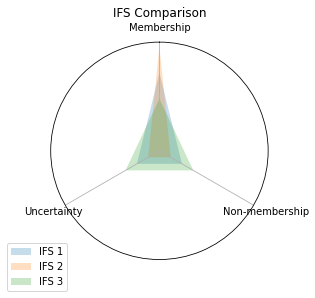

In [188]:
ifses_example = [[0.6, 0.2, 0.2], [0.8, 0.1, 0.1], [0.4, 0.3, 0.3]]
labels_example = ['IFS 1', 'IFS 2', 'IFS 3']
ifs_radar_plot(ifses_example, labels=labels_example, title='IFS Comparison')
plt.show()

## Single IFS bar plot

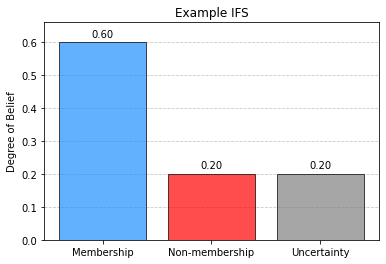

In [189]:
ifs_example = [0.6, 0.2, 0.2]
single_ifs_bar_plot(ifs_example, title='Example IFS')
plt.show()

## Single IFS pie plot

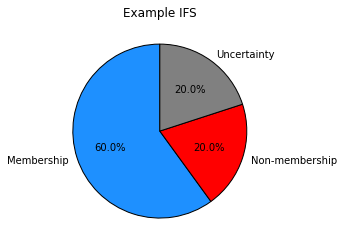

In [190]:
ifs_example = [0.6, 0.2, 0.2]
single_ifs_pie_plot(ifs_example, title='Example IFS')
plt.show()